In [1]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

# Reading data

In [2]:
!ls ../input/tabular-playground-series-may-2021

sample_submission.csv  test.csv  train.csv


In [3]:
data_folder = "../input/tabular-playground-series-may-2021"

train = pd.read_csv(f"{data_folder}/train.csv")
test = pd.read_csv(f"{data_folder}/test.csv")
sample_submission = pd.read_csv(f"{data_folder}/sample_submission.csv")

train.shape, test.shape, sample_submission.shape

((100000, 52), (50000, 51), (50000, 5))

# Functions

In [4]:
def show_IQR(series, bins_n=None):

    perc_25 = series.quantile(0.25, interpolation="midpoint")
    perc_75 = series.quantile(0.75, interpolation="midpoint")
    IQR = perc_75 - perc_25

    print(
        f"Unique values count: {series.nunique()}",
        f"\nQ1: {perc_25}\nQ3: {perc_75}\nIQR: {IQR}",
        f"\nOutliers borders: [{perc_25 - 1.5*IQR}, {perc_75 + 1.5*IQR}]",
    )

    fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
    sns.distplot(series.values, bins=bins_n, color="#50248f", ax=axes[0]).set(
        xlabel=series.name,
        ylabel="Quantity (frequency)",
        title=series.name + " distribution\n",
    )

    sns.boxplot(series.values, color="#38d1ff", ax=axes[1]).set(
        xlabel=series.name, title=series.name + " distribution\n"
    )

    plt.show()

# EDA

## Describe

In [5]:
train[[c for c in train.columns if c.startswith("feature")]].describe().T.sort_values(
    ["mean"], ascending=False
).style.bar(["mean"]).background_gradient(subset=["50%"], cmap="viridis")

,count,mean,std,min,25%,50%,75%,max
feature_38,100000.000000,2.997170,5.386551,-8.000000,0.000000,1.000000,4.000000,66.000000
feature_14,100000.000000,2.597320,4.655092,0.000000,0.000000,1.000000,3.000000,51.000000
feature_19,100000.000000,1.564780,4.749449,-2.000000,0.000000,0.000000,1.000000,55.000000
feature_31,100000.000000,1.372040,3.319325,-1.000000,0.000000,0.000000,1.000000,46.000000
feature_15,100000.000000,1.242030,2.160111,0.000000,0.000000,0.000000,2.000000,20.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_34,100000.000000,1.122150,2.493045,0.000000,0.000000,0.000000,1.000000,25.000000
feature_28,100000.000000,1.106060,1.879629,0.000000,0.000000,0.000000,2.000000,23.000000
feature_24,100000.000000,1.040130,2.539910,0.000000,0.000000,0.000000,1.000000,34.000000
feature_48,100000.000000,0.970850,2.576615,0.000000,0.000000,0.000000,1.000000,44.000000


In [6]:
train.nunique().sort_values()

target             4
feature_13         4
feature_36         4
feature_22         5
feature_2          7
feature_44        10
feature_5         11
feature_0         11
feature_12        12
feature_11        13
feature_29        14
feature_18        14
feature_37        15
feature_17        17
feature_10        17
feature_9         18
feature_20        18
feature_16        20
feature_23        20
feature_15        21
feature_49        21
feature_26        22
feature_40        22
feature_25        23
feature_28        24
feature_33        25
feature_3         26
feature_34        26
feature_47        26
feature_45        27
feature_6         28
feature_46        30
feature_32        30
feature_1         31
feature_41        31
feature_27        32
feature_7         32
feature_43        33
feature_24        35
feature_21        36
feature_8         37
feature_4         38
feature_42        40
feature_30        43
feature_35        44
feature_48        45
feature_31        46
feature_14   

In [7]:
train.feature_38.value_counts(), train.feature_13.value_counts()

( 0     42216
  1     13688
  2      9798
  3      7143
  4      5807
        ...  
 -3         1
 -5         1
 -8         1
  65        1
  66        1
 Name: feature_38, Length: 71, dtype: int64,
 0    94912
 1     3082
 2     1535
 3      471
 Name: feature_13, dtype: int64)

## Distribution plots

all features looks like nominative or ordinal variables

Unique values count: 10 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


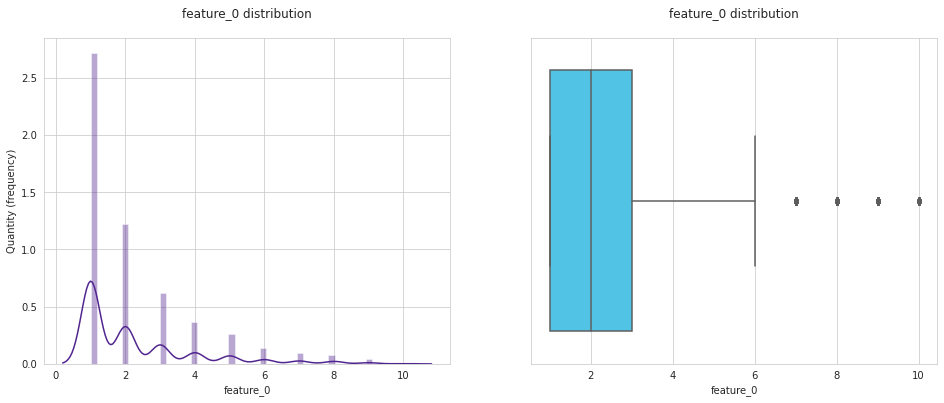

Unique values count: 30 
Q1: 1.0
Q3: 5.0
IQR: 4.0 
Outliers borders: [-5.0, 11.0]


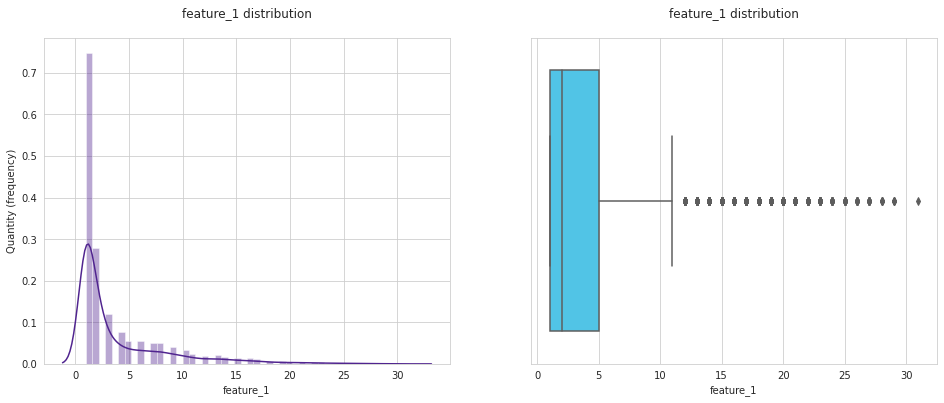

Unique values count: 6 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


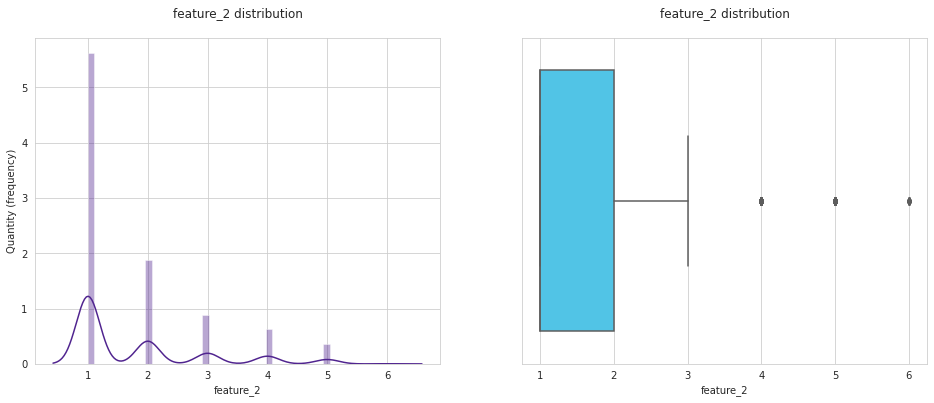

Unique values count: 25 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


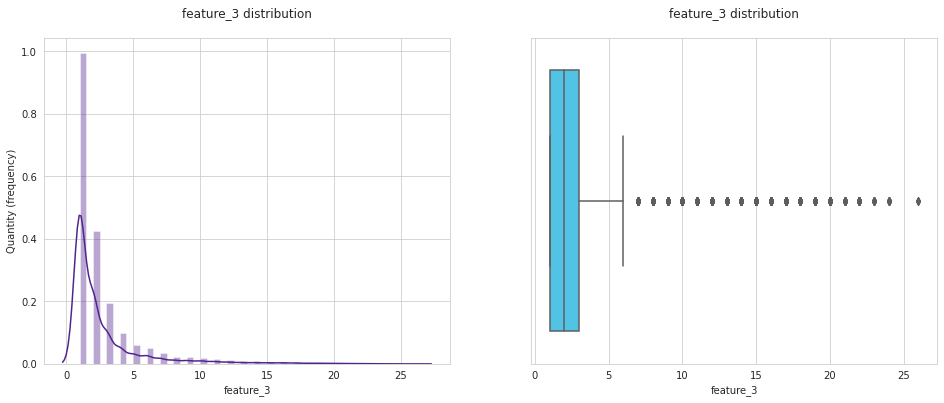

Unique values count: 37 
Q1: 1.0
Q3: 7.0
IQR: 6.0 
Outliers borders: [-8.0, 16.0]


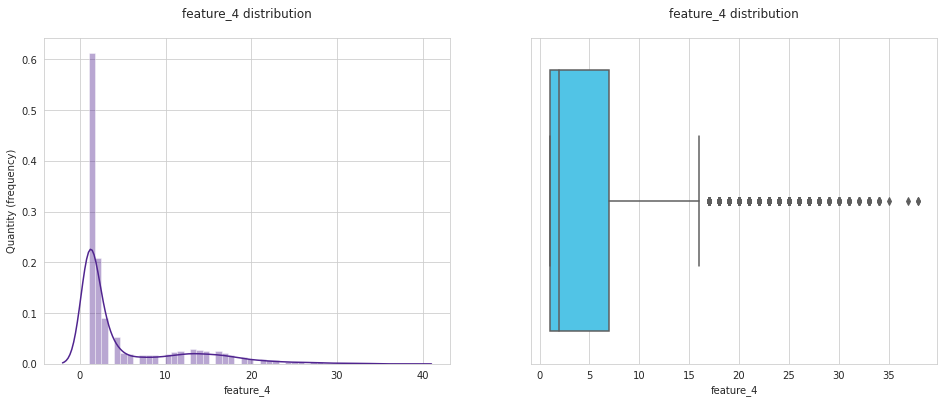

Unique values count: 10 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


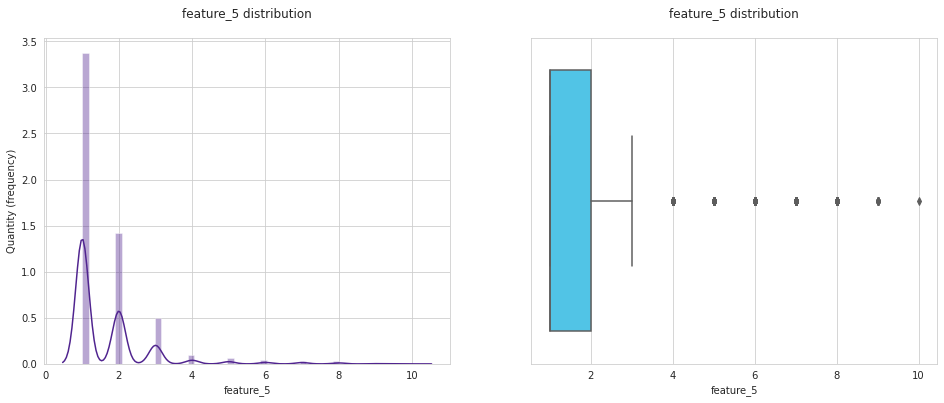

Unique values count: 27 
Q1: 1.0
Q3: 6.0
IQR: 5.0 
Outliers borders: [-6.5, 13.5]


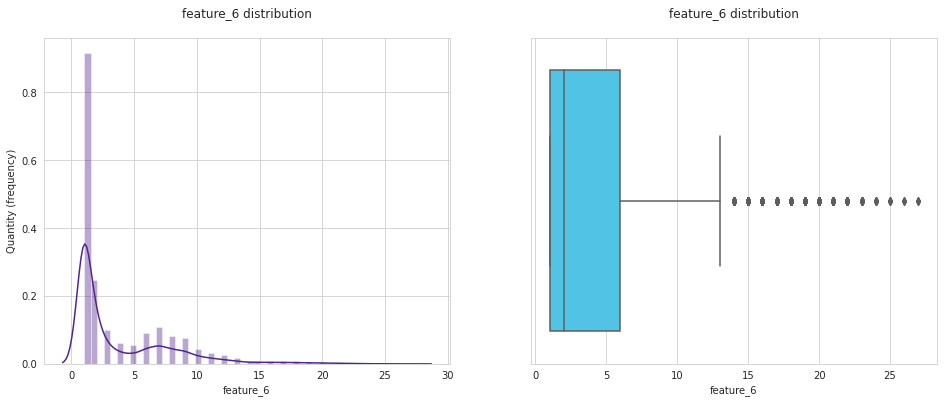

Unique values count: 31 
Q1: 1.0
Q3: 5.0
IQR: 4.0 
Outliers borders: [-5.0, 11.0]


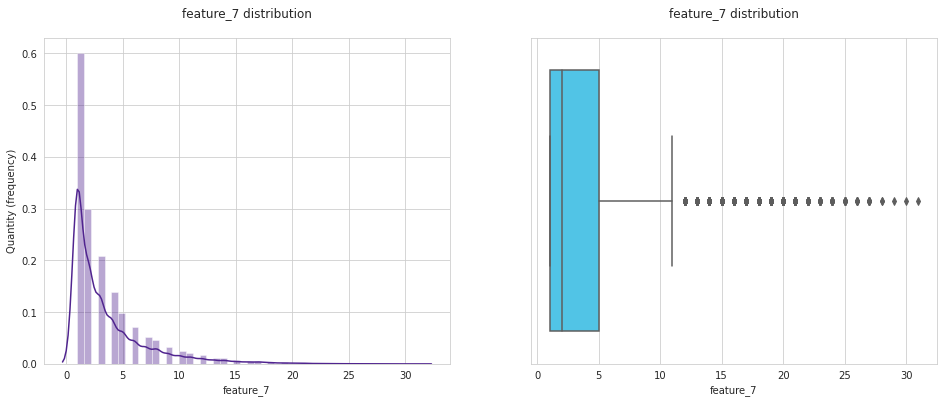

Unique values count: 36 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


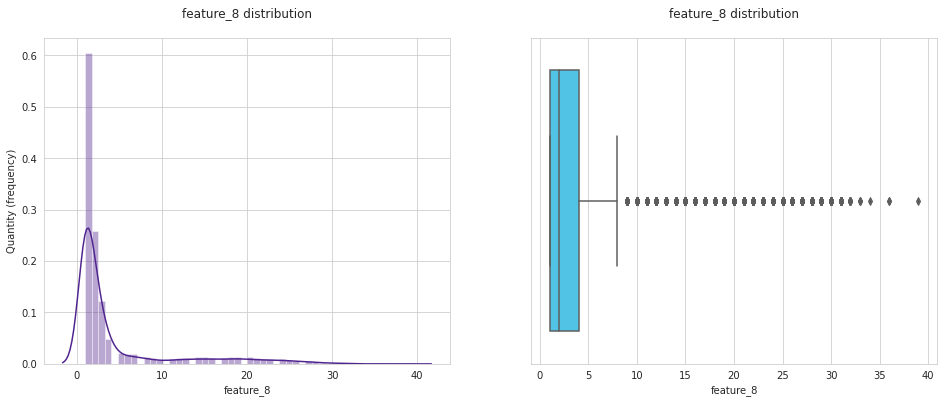

Unique values count: 17 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


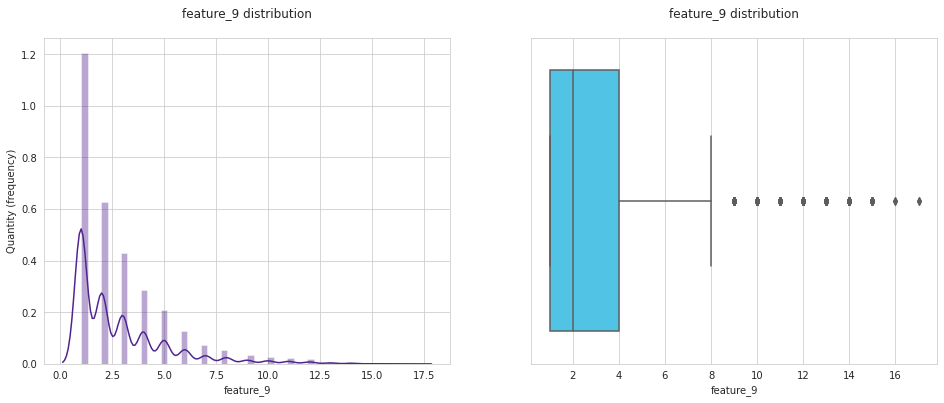

Unique values count: 16 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


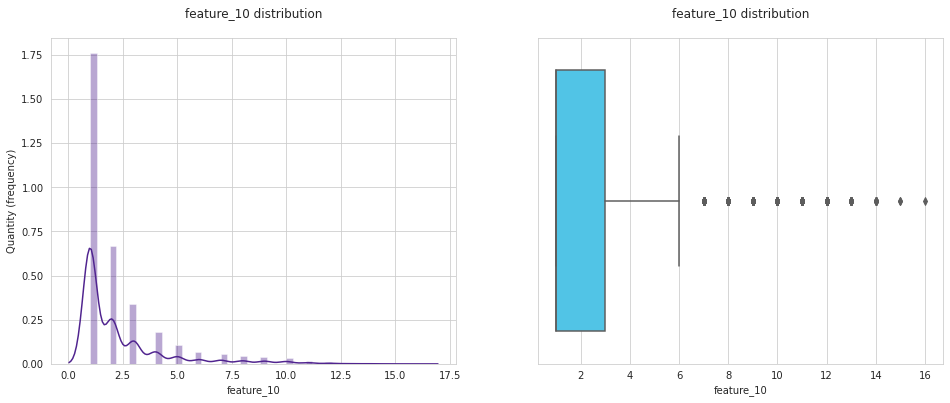

Unique values count: 12 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


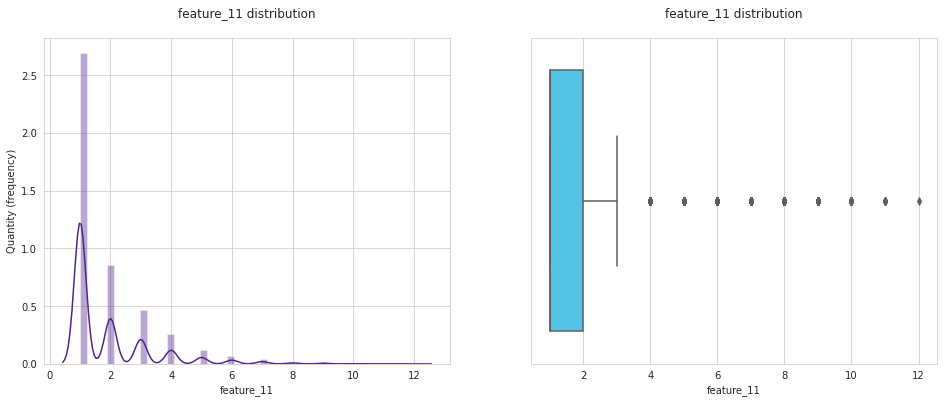

Unique values count: 11 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


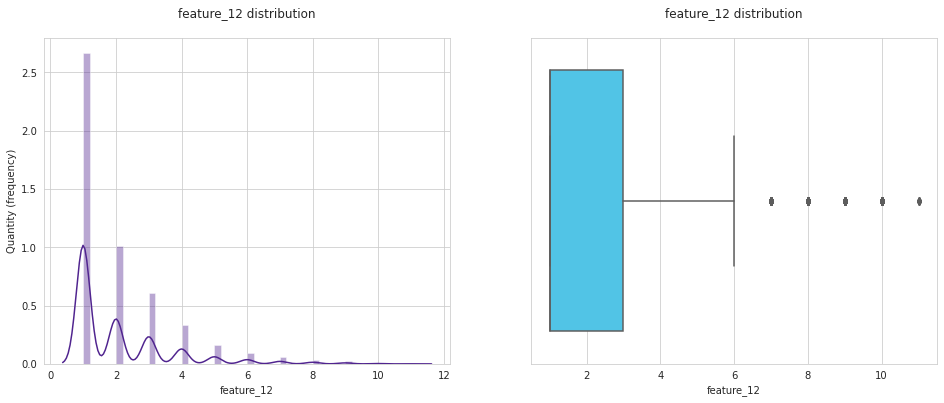

Unique values count: 3 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


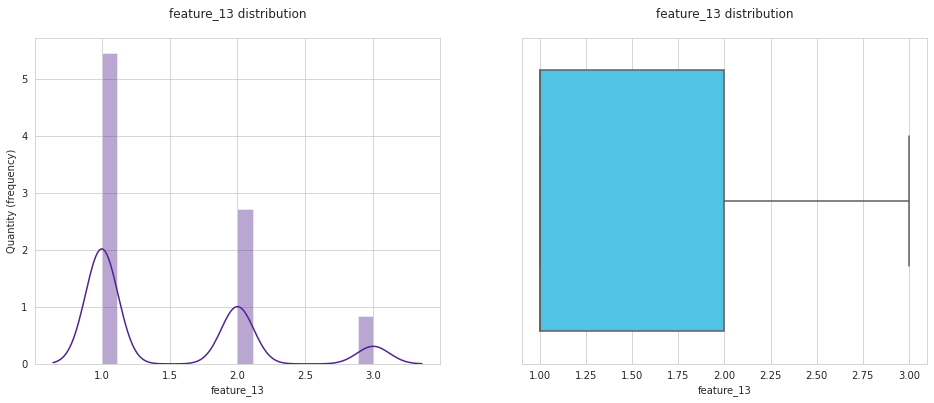

Unique values count: 51 
Q1: 1.0
Q3: 5.0
IQR: 4.0 
Outliers borders: [-5.0, 11.0]


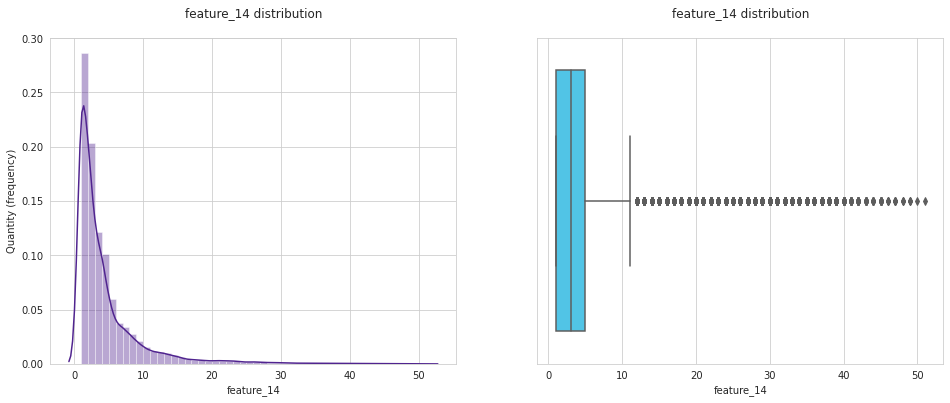

Unique values count: 20 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


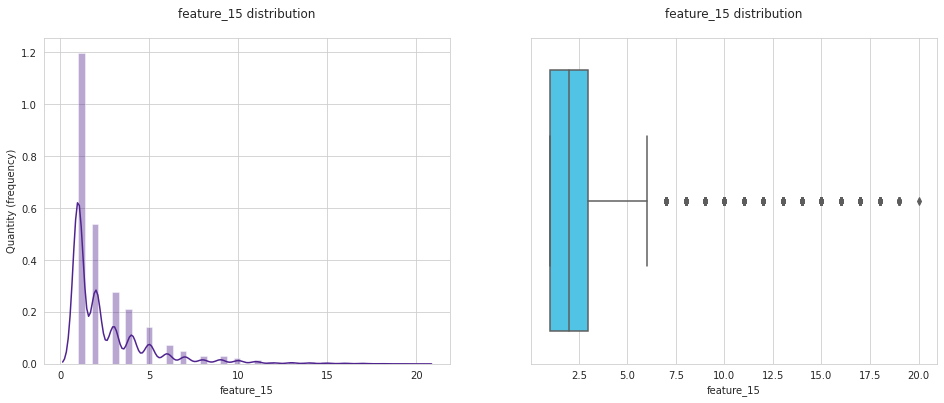

Unique values count: 19 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


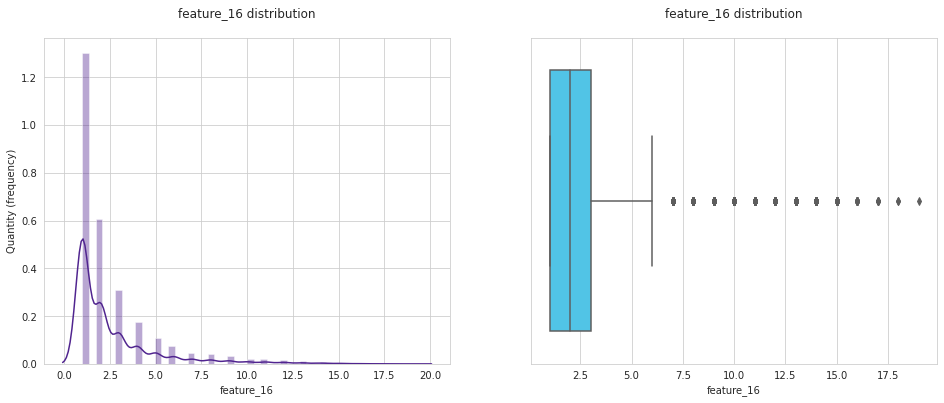

Unique values count: 16 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


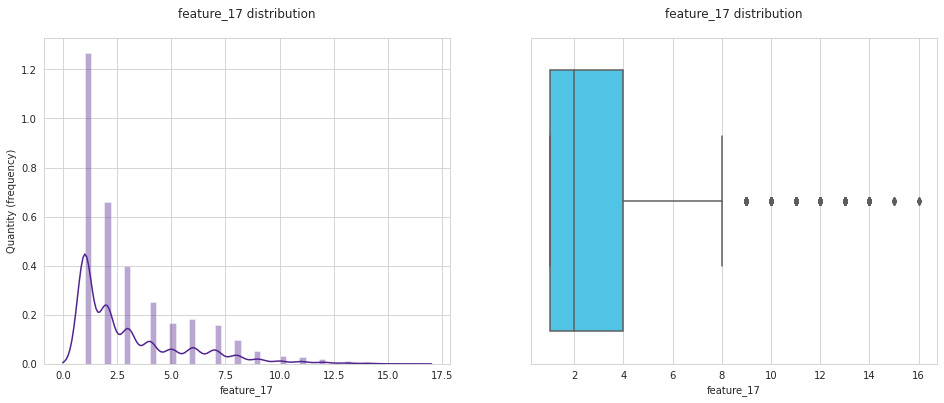

Unique values count: 13 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


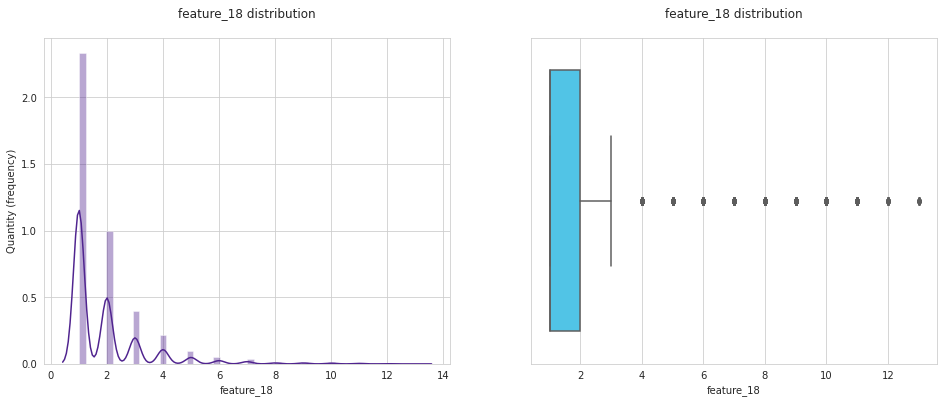

Unique values count: 57 
Q1: 1.0
Q3: 9.0
IQR: 8.0 
Outliers borders: [-11.0, 21.0]


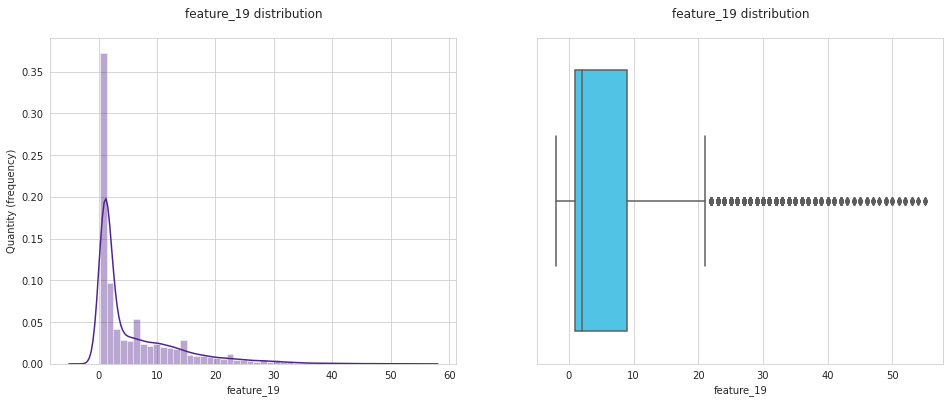

Unique values count: 17 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


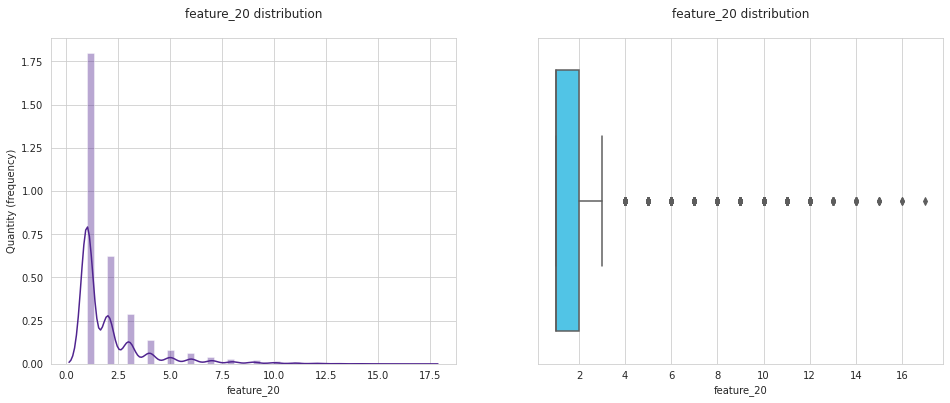

Unique values count: 35 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


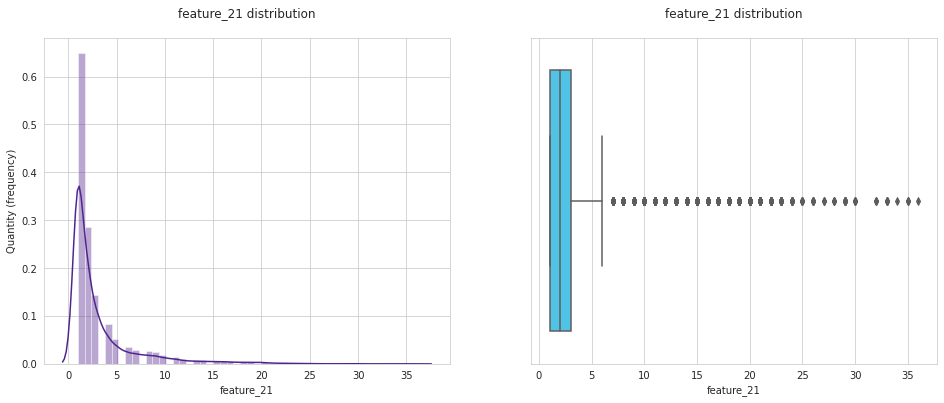

Unique values count: 4 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


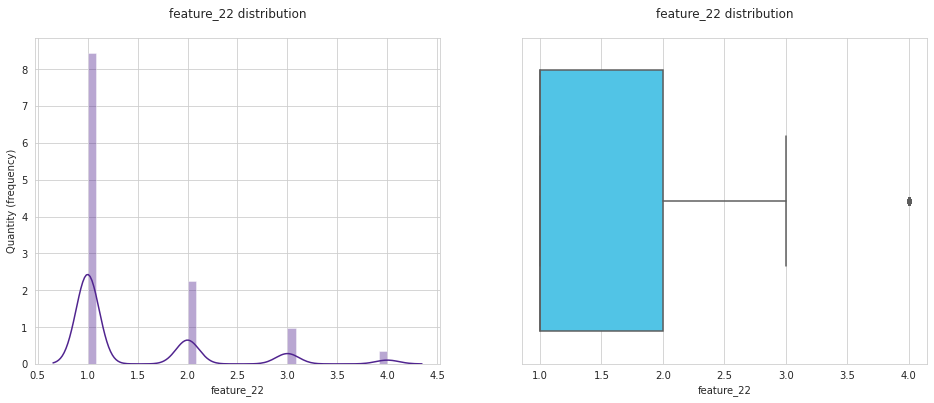

Unique values count: 19 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


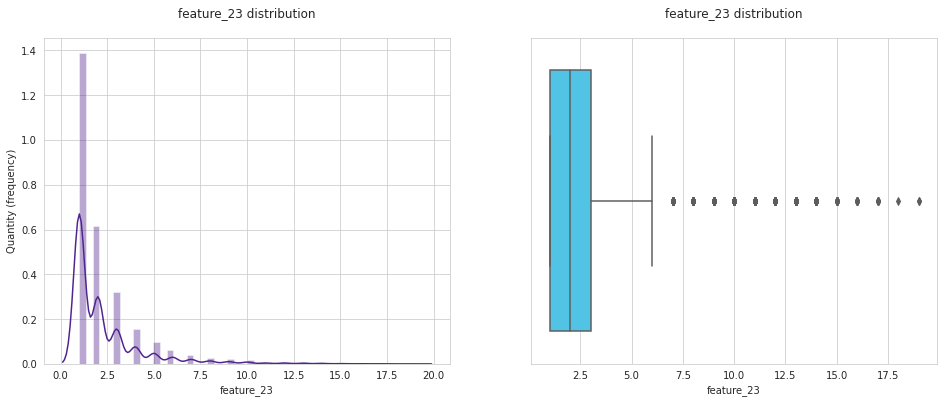

Unique values count: 34 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


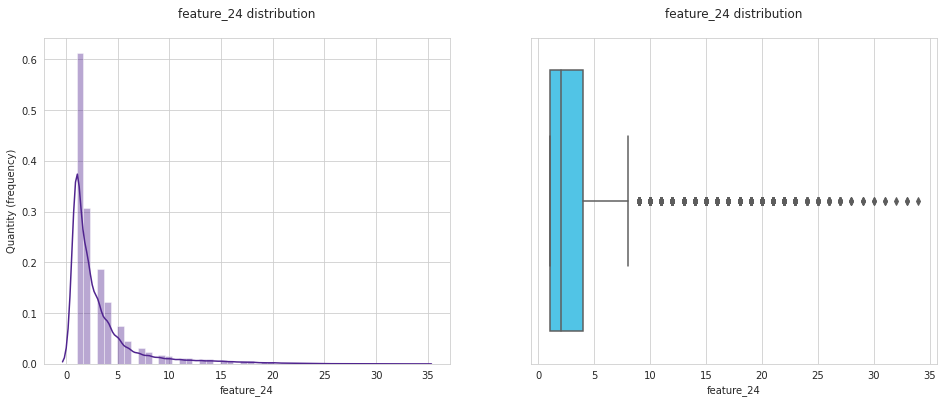

Unique values count: 22 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


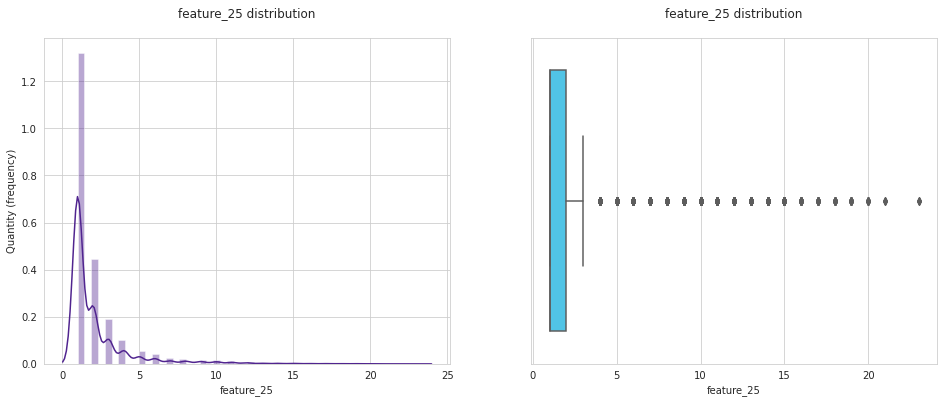

Unique values count: 21 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


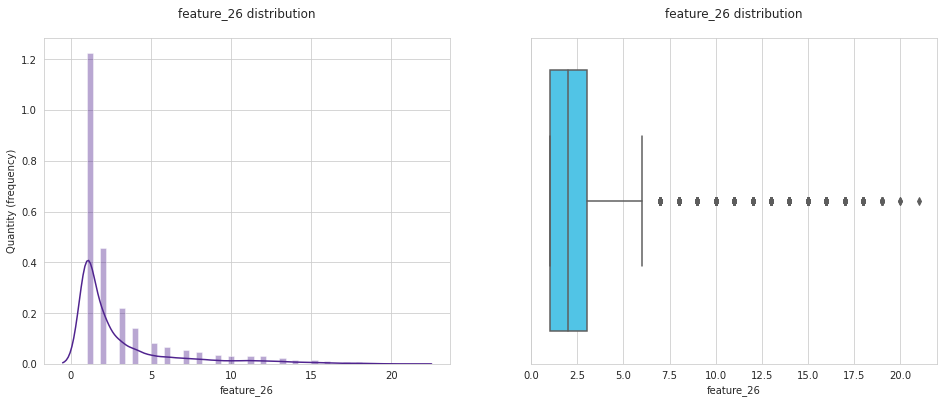

Unique values count: 31 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


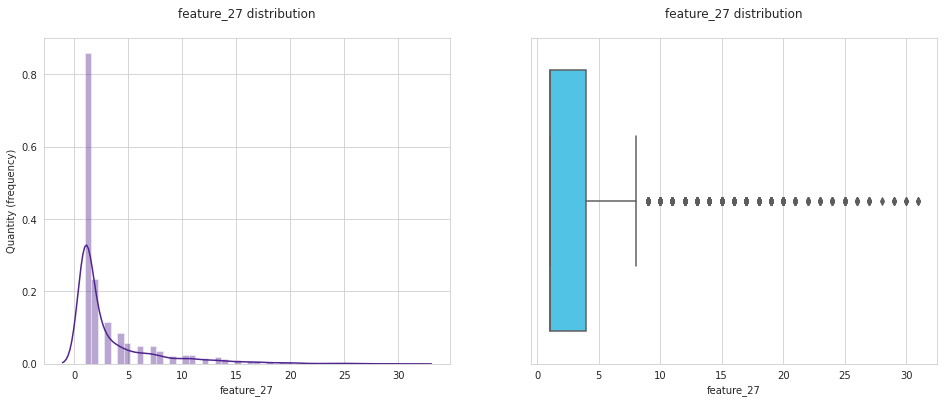

Unique values count: 23 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


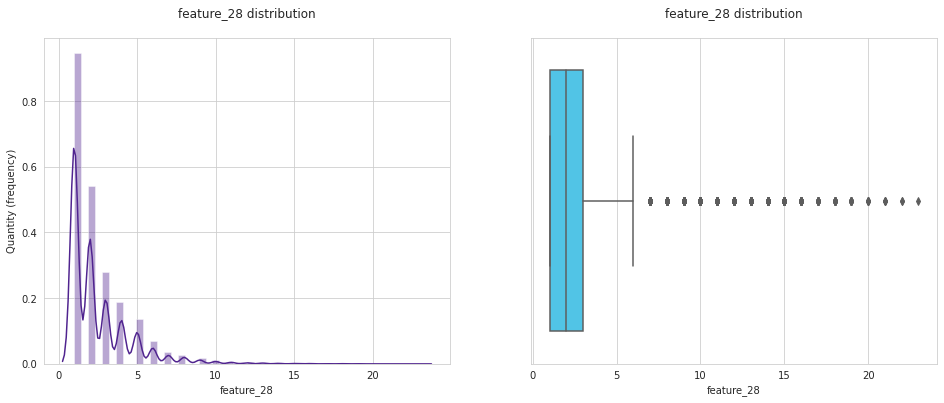

Unique values count: 13 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


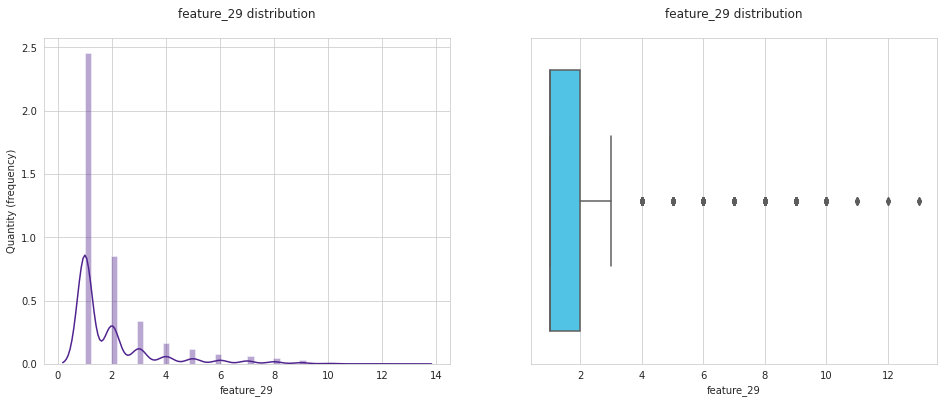

Unique values count: 42 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


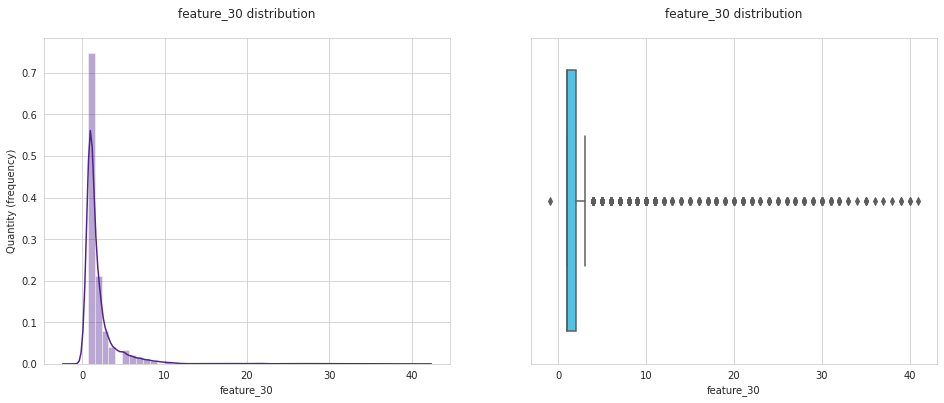

Unique values count: 45 
Q1: 1.0
Q3: 5.0
IQR: 4.0 
Outliers borders: [-5.0, 11.0]


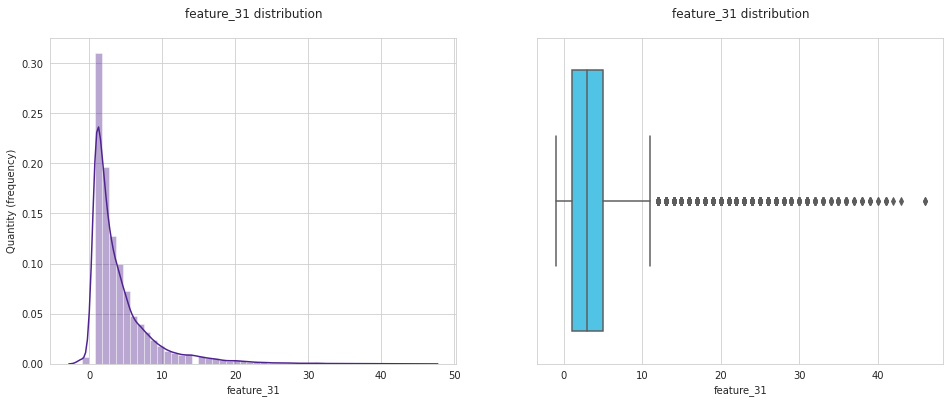

Unique values count: 29 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


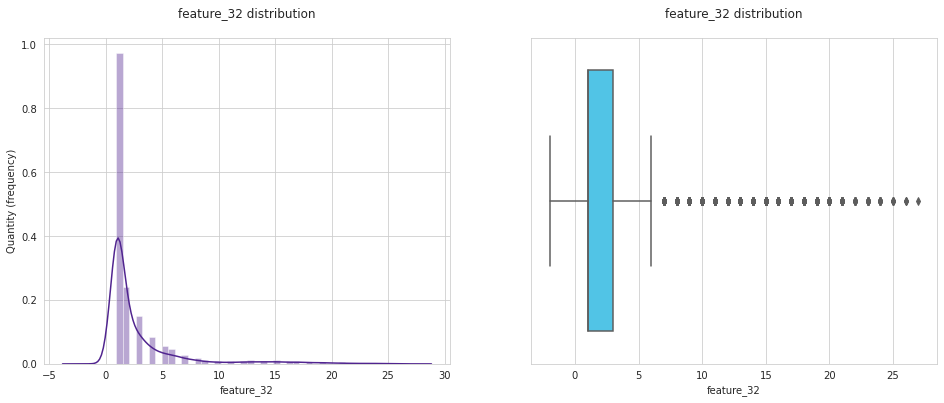

Unique values count: 24 
Q1: 1.0
Q3: 6.0
IQR: 5.0 
Outliers borders: [-6.5, 13.5]


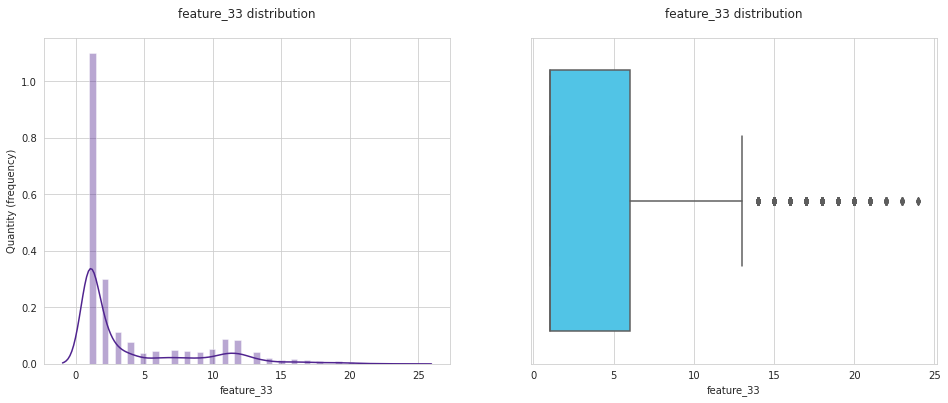

Unique values count: 25 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


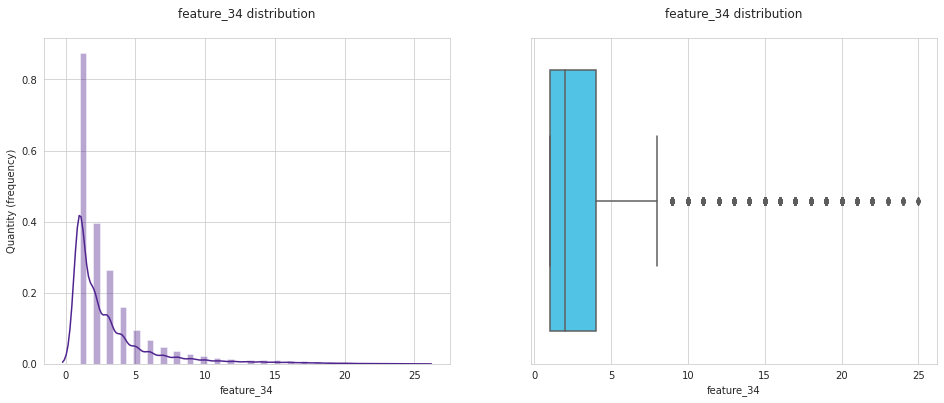

Unique values count: 43 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


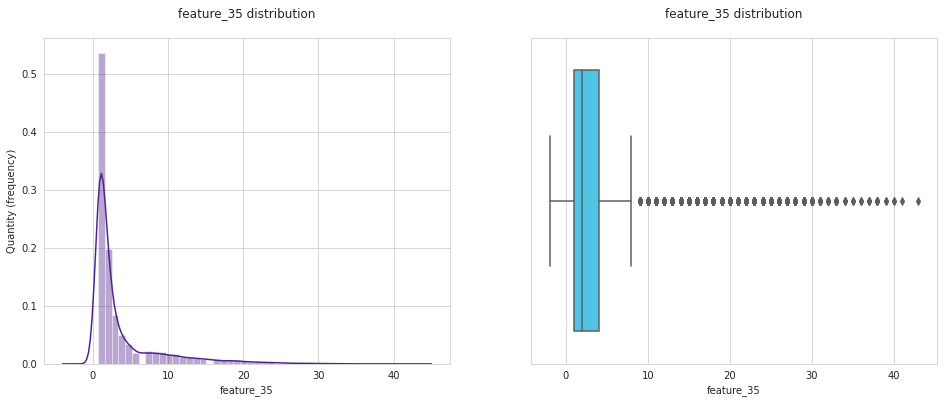

Unique values count: 3 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


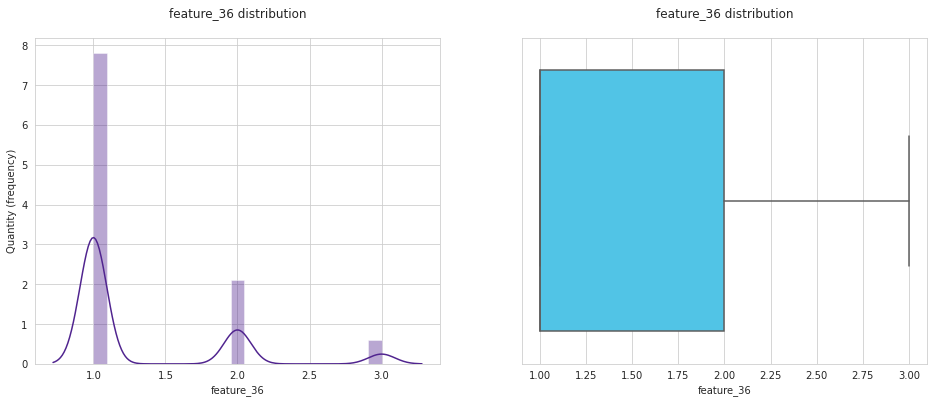

Unique values count: 14 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


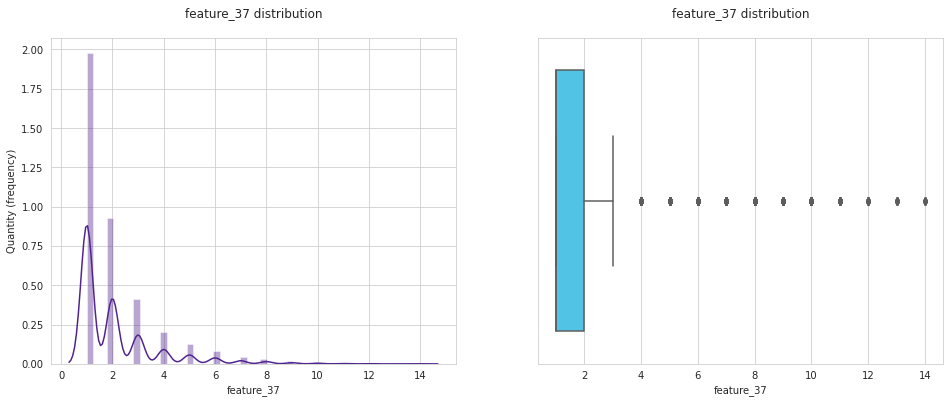

Unique values count: 70 
Q1: 2.0
Q3: 6.0
IQR: 4.0 
Outliers borders: [-4.0, 12.0]


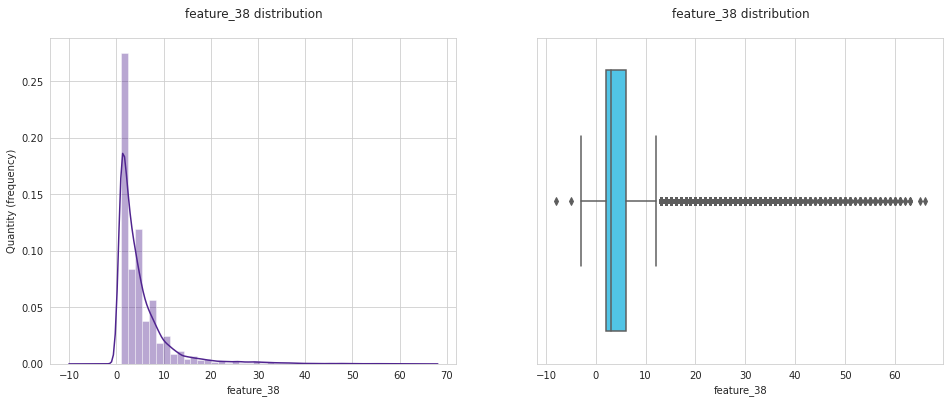

Unique values count: 69 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


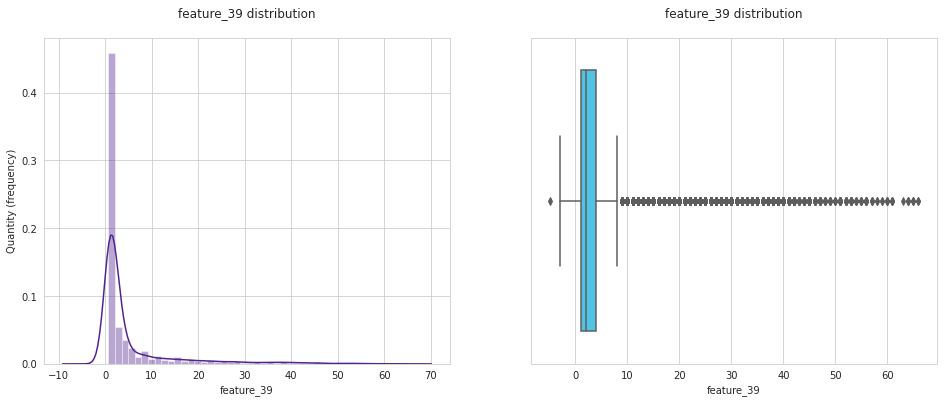

Unique values count: 21 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


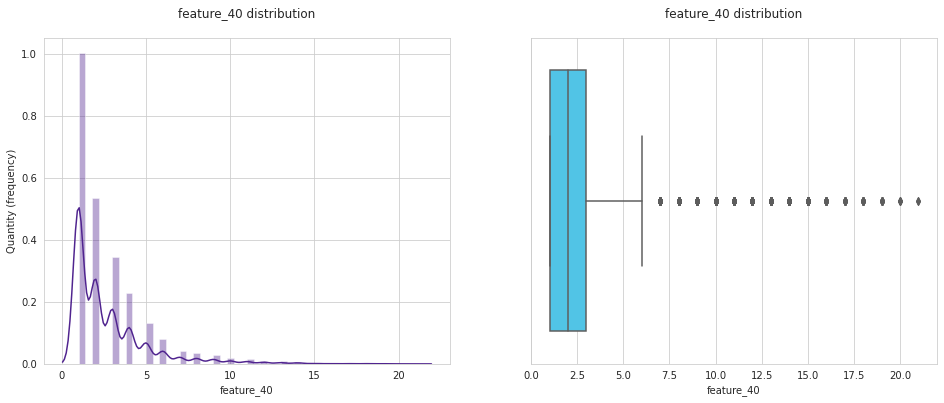

Unique values count: 30 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


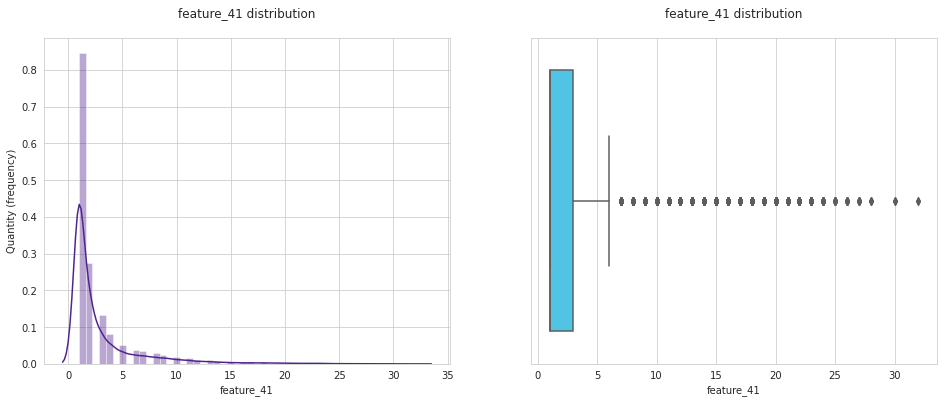

Unique values count: 39 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


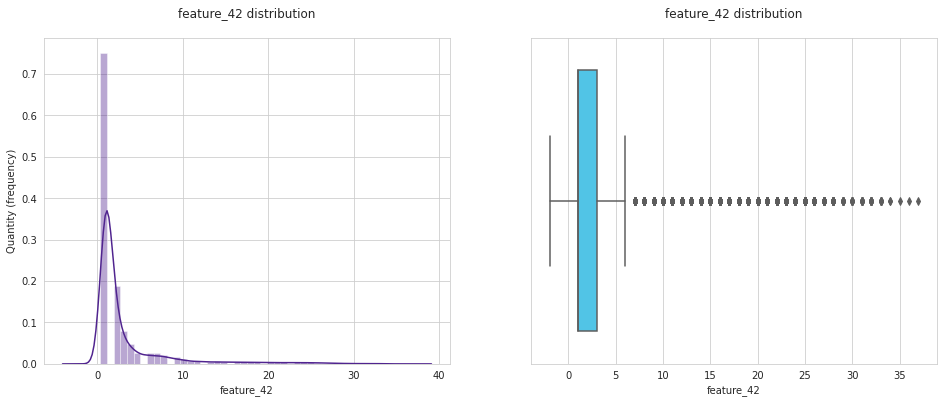

Unique values count: 32 
Q1: 1.0
Q3: 5.0
IQR: 4.0 
Outliers borders: [-5.0, 11.0]


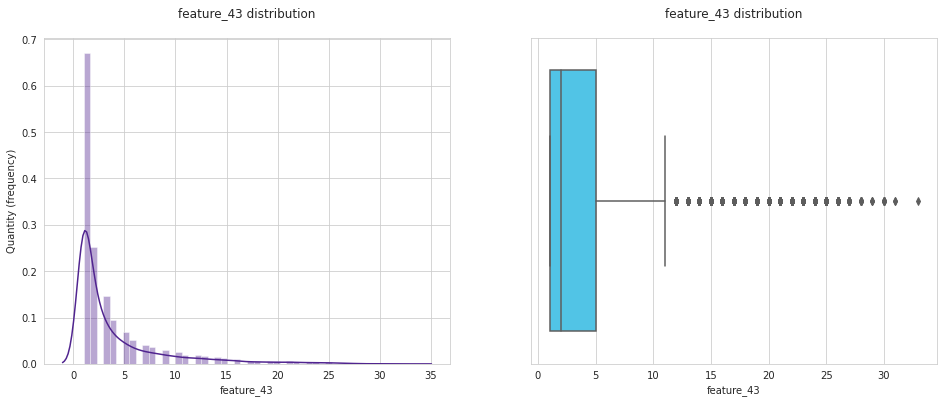

Unique values count: 9 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


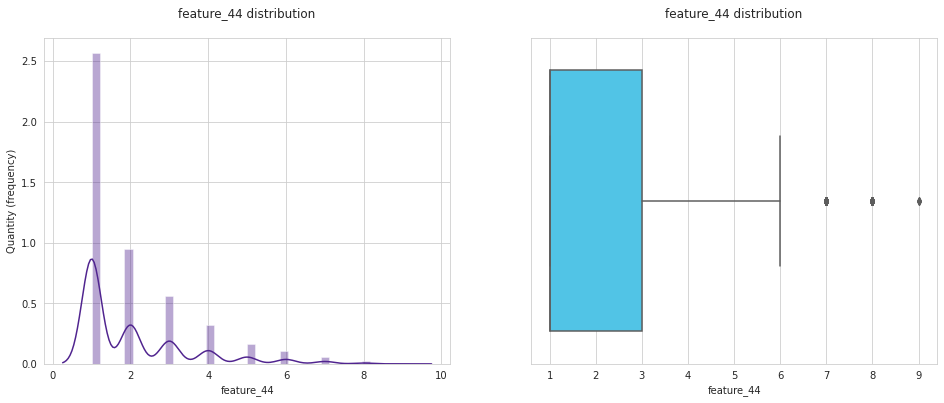

Unique values count: 26 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


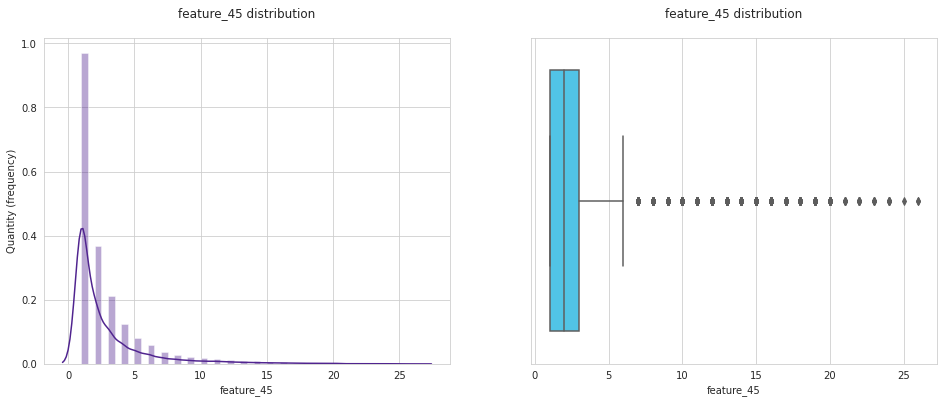

Unique values count: 29 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


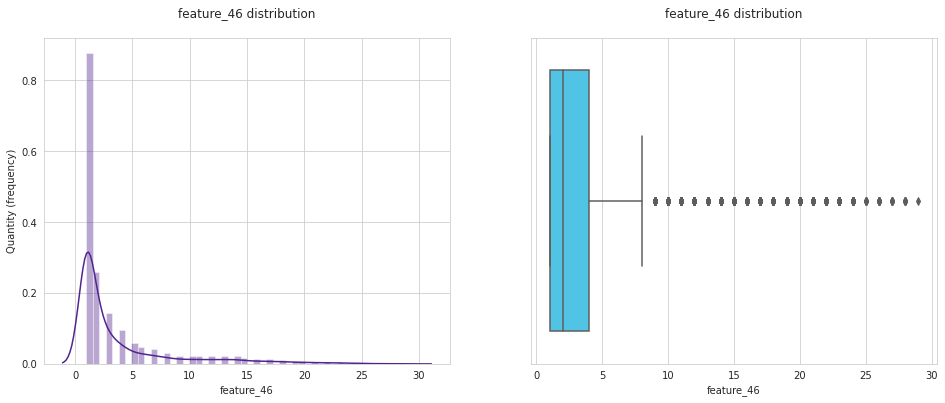

Unique values count: 25 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


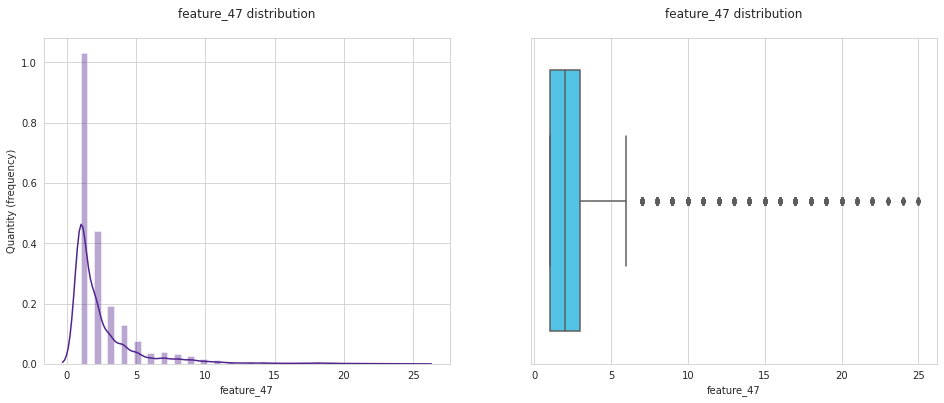

Unique values count: 44 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


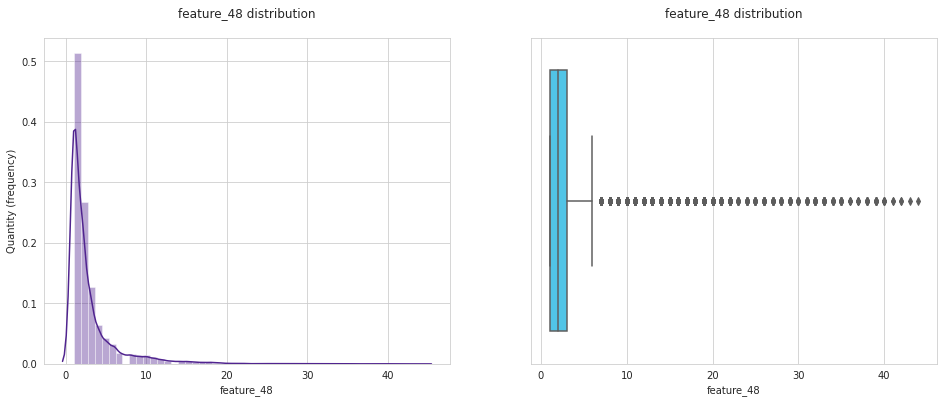

Unique values count: 20 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


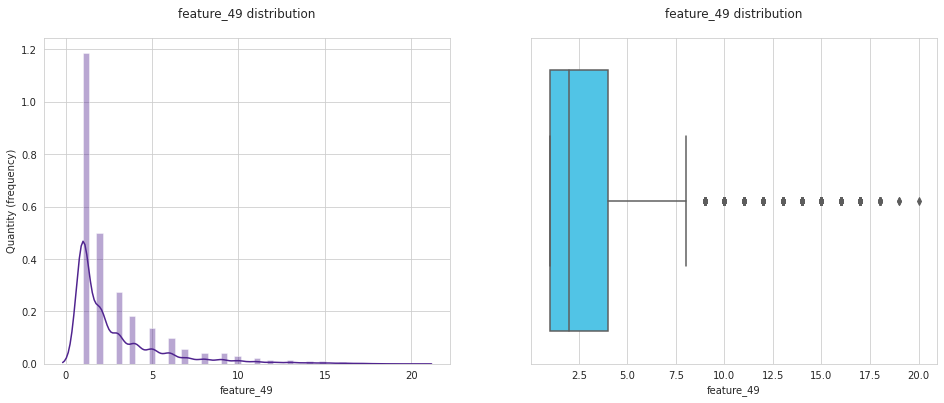

In [8]:
# zeros are outliers, let's exclude it for more clear picture

for c in train.columns:
    if c.startswith("feature"):
        show_IQR(train.query(f"{c} != 0")[c], None)

## Correlation

<AxesSubplot:>

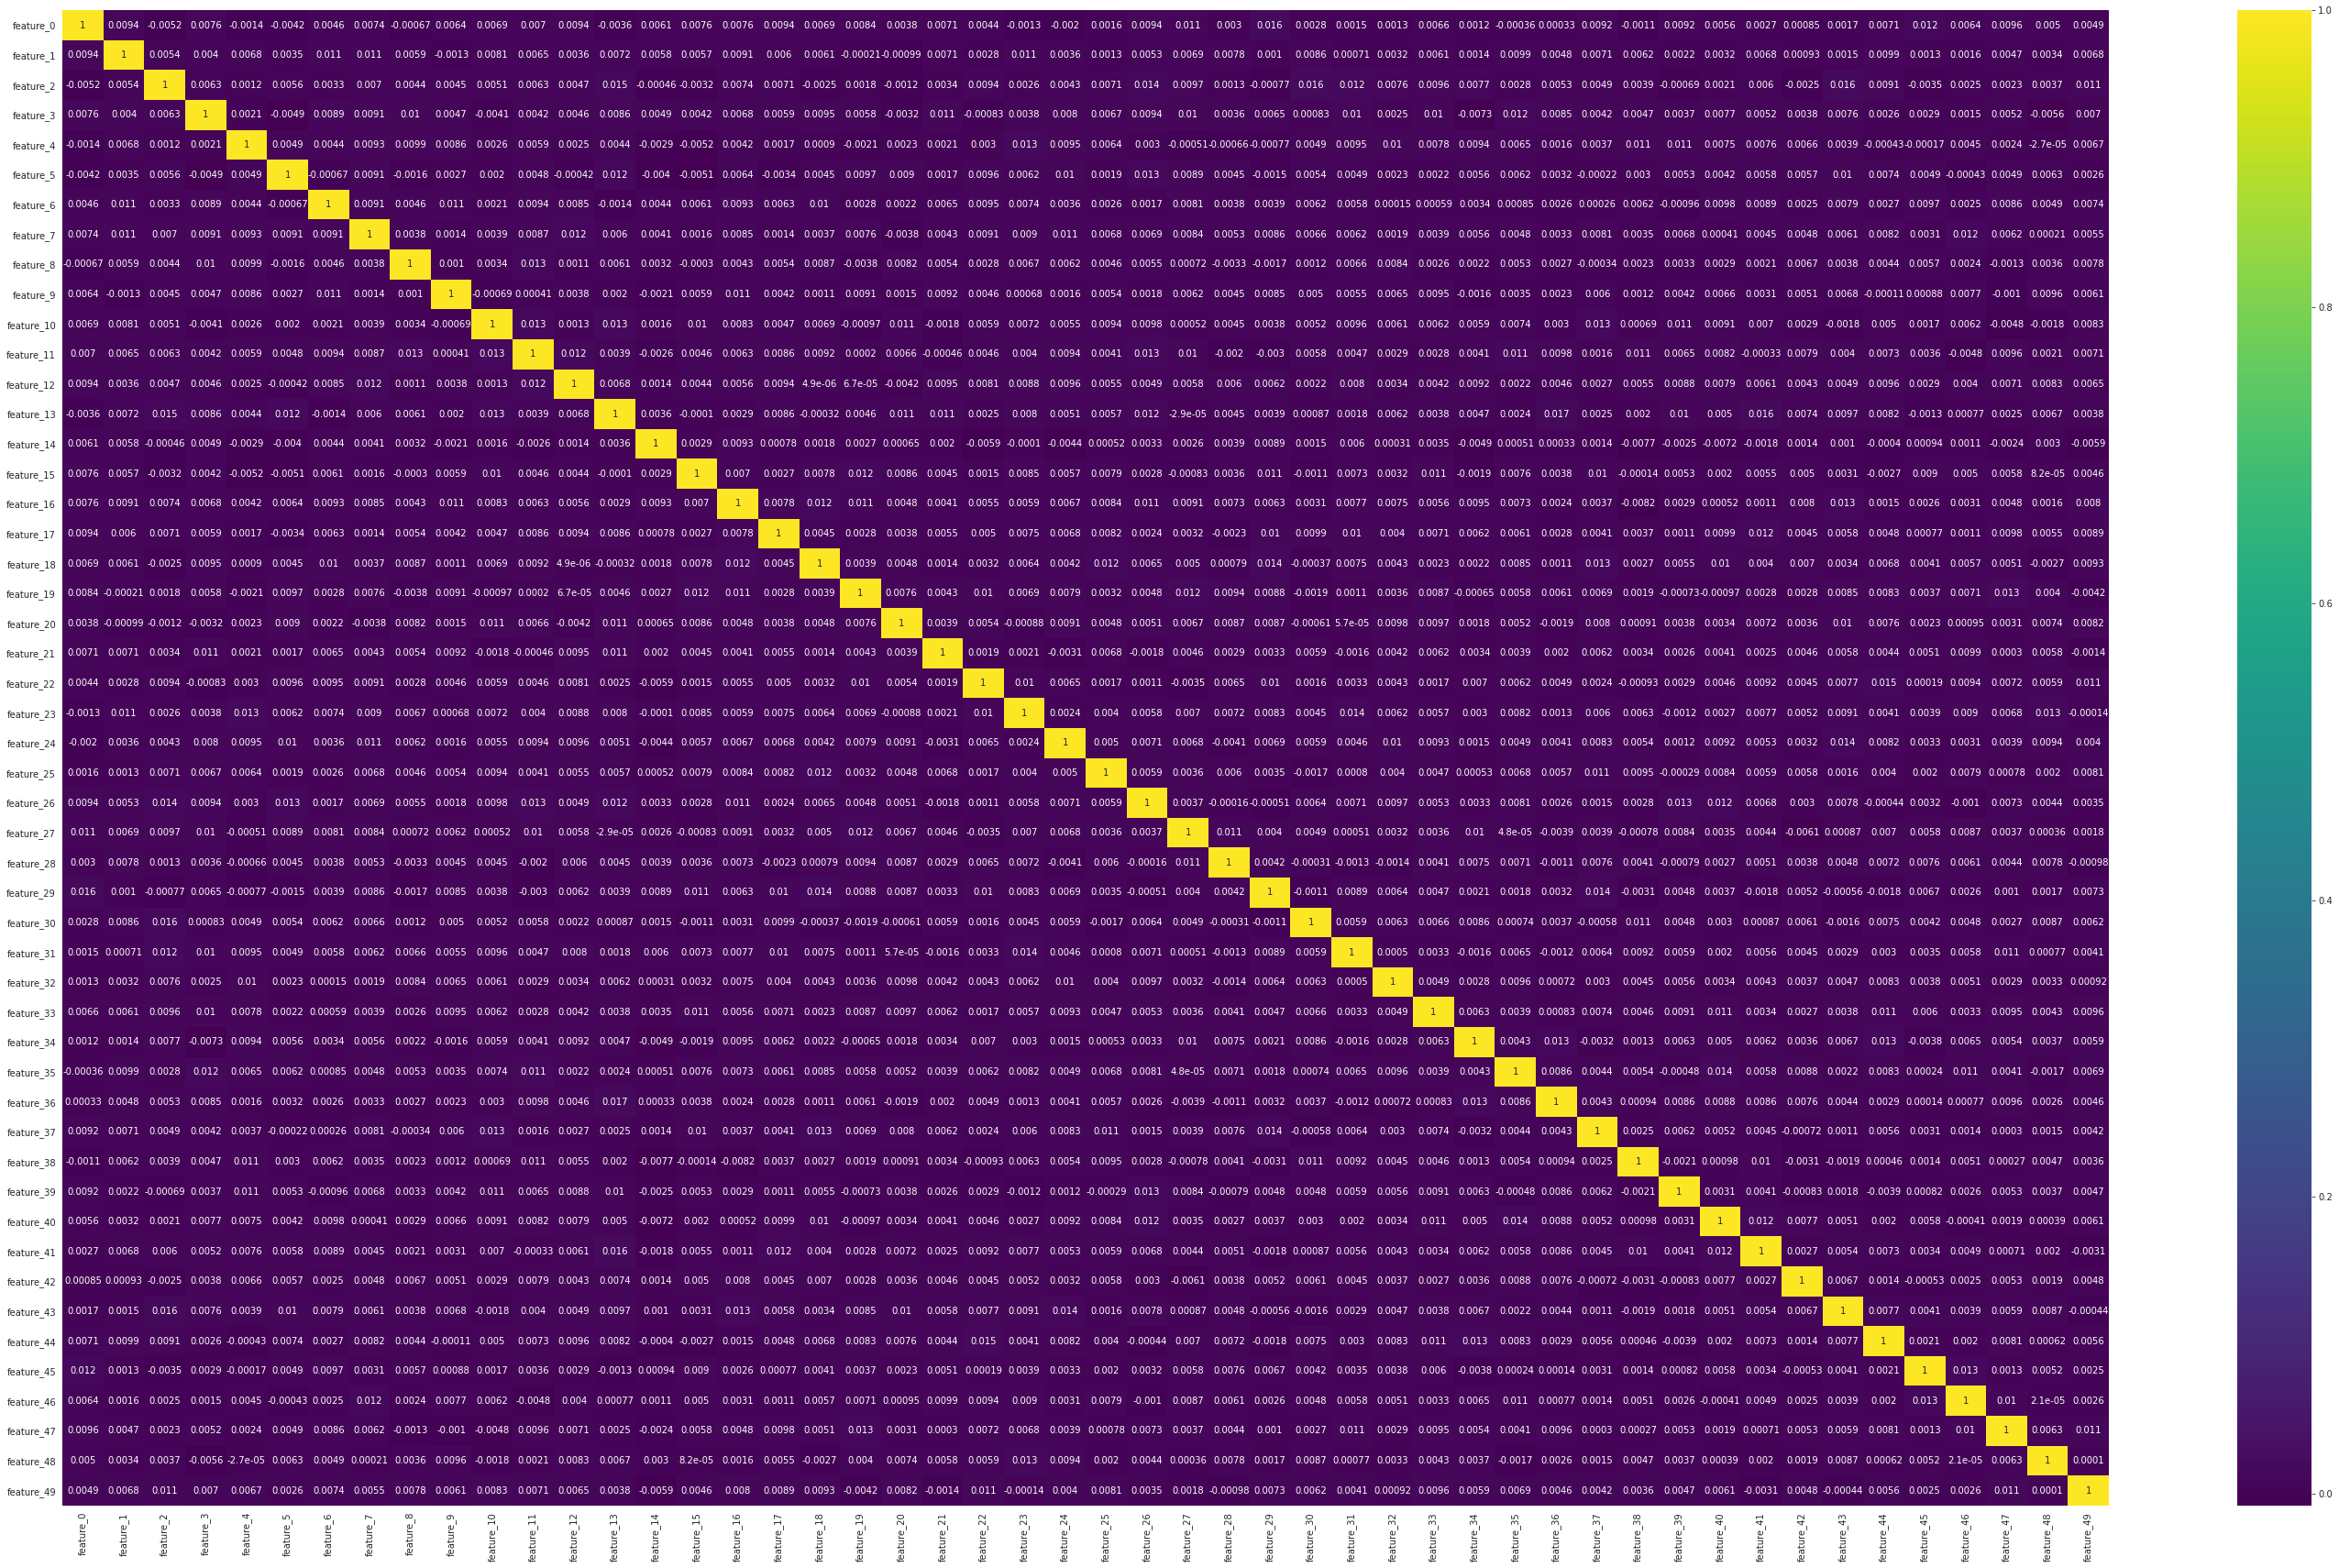

In [9]:
plt.figure(figsize=(50,30))
sns.heatmap(train[[c for c in train.columns if c.startswith("feature")]].replace({0, np.nan}).corr(), annot=True, cmap="viridis")

# Data cleanup and transformation

... work in progress